In [6]:
pwd

'/home/wsuser/work'

In [7]:
!pip install keras==2.2.4
!pip install tensorflow==2.5.0

     |████████████████████████████████| 312 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 7.5 MB/s  eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 454.4 MB 19 kB/s s eta 0:00:01|████▍                           | 61.6 MB 41.1 MB/s eta 0:00:10 |████▊                           | 67.0 MB 41.1 MB/s eta 0:00:10 |████▉                           | 69.0 MB 41.1 MB/s eta 0:00:1055MB 24.3 MB/s eta 0:00:15MB 36.0 MB/s eta 0:00:10MB 36.0 MB/s eta 0:00:10MB 36.0 MB/s eta 0:00:10��███▎                      | 131.3 MB 36.0 MB/s eta 0:00:09��███▌                   

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.2.1
    Uninstalling h5py-3.2.1:
      Successfully uninstalled h5py-3.2.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstal

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='sZmW7ChAxF_z7fqdh9QjWZaoANyi2onbO3YJsULM0GGe',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'classificationofecg-donotdelete-pr-pvvx2hiz4wniw3'
object_key = 'project.ipynb'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [9]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='sZmW7ChAxF_z7fqdh9QjWZaoANyi2onbO3YJsULM0GGe',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'classificationofecg-donotdelete-pr-pvvx2hiz4wniw3'
object_key = 'Classification of Arrhythmia by Using Deep Learning with 2-D ECG Spectral Image Representation.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [10]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [11]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#image_augmentation

In [13]:
train_ds=ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True)

In [14]:
test_ds=ImageDataGenerator(rescale=1./255)

In [16]:
x_train=train_ds.flow_from_directory(r'data/train',
                                     target_size=(192,128),
                                     class_mode='categorical',
                                     batch_size=32)

Found 15341 images belonging to 6 classes.


In [17]:
x_test=test_ds.flow_from_directory(r'data/test',
                                   target_size=(192,128),
                                   class_mode='categorical',
                                   batch_size=32)

Found 6825 images belonging to 6 classes.


In [18]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [19]:
#sprint-2
#create model

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [22]:
model=Sequential()

In [23]:
#add layers

In [24]:
model.add(Convolution2D(32,(3,3),input_shape=(192,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(6,activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44160)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/tmp/wsuser/ipykernel_164/1926459362.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
480/480 [==============================] - 327s 679ms/step - loss: 1.5080 - accuracy: 0.4747 - val_loss: 1.5269 - val_accuracy: 0.3193
Epoch 2/10
480/480 [==============================] - 326s 679ms/step - loss: 0.7394 - accuracy: 0.7544 - val_loss: 0.7448 - val_accuracy: 0.7364
Epoch 3/10
480/480 [==============================] - 323s 672ms/step - loss: 0.3862 - accuracy: 0.8810 - val_loss: 0.8211 - val_accuracy: 0.8113
Epoch 4/10
480/480 [==============================] - 323s 673ms/step - loss: 0.3552 - accuracy: 0.8918 - val_loss: 0.7482 - val_accuracy: 0.7848
Epoch 5/10
480/480 [==============================] - 323s 673ms/step - loss: 0.3435 - accuracy: 0.8977 - val_loss: 0.8243 - val_accuracy: 0.8275
Epoch 6/10
480/480 [==============================] - 322s 670ms/step - loss: 0.3232 - accuracy: 0.9007 - val_loss: 0.7220 - val_accuracy: 0.8116
Epoch 7/10
480/480 [==============================] - 331s 689ms/step - loss: 0.3285 - accuracy: 0.9021 - val_loss: 0.6537 -

In [28]:

model.save('ECG.h5')


In [91]:
!tar -zcvf image-Classification-model_new.tgz ECG.h5

ECG.h5


In [92]:
ls -1

data/
ECG.h5
image-Classification-model_new.tgz


In [31]:
#testing the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model("ECG.h5")

In [33]:
img1=image.load_img(r'data/test/Premature Ventricular Contractions/VEBfig_13.png')

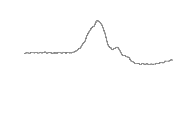

In [34]:
img1

In [35]:
img1=img1.resize((128,192))

In [36]:
x=image.img_to_array(img1)

In [37]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [38]:
import numpy as np

In [39]:
x=np.expand_dims(x,axis=0)

In [40]:
y=np.argmax(model.predict(x))

In [41]:
y

3

In [42]:
index=['Left Bundle Branch Block','Normal','Premature Atrial Contractions','Premature Ventricular Contractions','Right Bundle Branch Block','Ventricular Fibrillation']

In [43]:
index[y]

'Premature Ventricular Contractions'

In [ ]:
client.repository.download(model_id,'my_model.tar.gz')

In [50]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [51]:
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 14.6 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.


In [54]:
#deployment
!pip install watson-machine-learning--Client

     |████████████████████████████████| 538 kB 21.9 MB/s eta 0:00:01


In [57]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"jODT-AnyGz3AWuG_kZdrQUOBNM5whihNrQnnLZ-h1x3U"
}
client=APIClient(wml_credentials)

In [101]:
client


In [102]:
def guid_space_name(client,img_class):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==ecg_deploy)['metadata']['id'])

In [103]:
space_uid=guid_space_name(client,'ecg_deploy')
print("Space UID"+space_uid)

StopIteration: 

In [81]:
client.set.default_space(space_uid)

NameError: name 'space_uid' is not defined

In [83]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_1.15-py3.6')

In [84]:
software_space_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [89]:
model_details=client.repository.store_model(model='ECG.h5',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:'KERAS_2.2.4',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})
model_id=client.repository.get_model_uid(model_details)

Saving trained model in repository failed. 'ECG.h5' file does not have valid format


WMLClientError: Saving trained model in repository failed. 'ECG.h5' file does not have valid format

In [ ]:
model_id

In [ ]:
client.repository.download(model_id,'my_model.tar.gz')

In [82]:
client.repository.download(model_id,'fruit-training.ter.gz')

NameError: name 'model_id' is not defined